# Assignment 2 :  Face Generation Task


```
- Machine Learning, Innopolis University (Fall semester 2021)
- Name : Ivan Efremov
- Email : i.efremov@innopolis.university
```
<hr>


# Task Brief Description

In this bonus task, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The notebook will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

## Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

## Pre-processed Data

Since the task's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-face-generation/assets/processed_face_data.png?raw=1' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that will be extracted in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

In [2]:
# can comment out after executing
# !wget https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip
# !unzip "processed-celeba-small.zip" -d "processed_celeba_small"

Archive:  processed-celeba-small.zip
   creating: processed_celeba_small/processed_celeba_small/
  inflating: processed_celeba_small/processed_celeba_small/.DS_Store  
   creating: processed_celeba_small/__MACOSX/
   creating: processed_celeba_small/__MACOSX/processed_celeba_small/
  inflating: processed_celeba_small/__MACOSX/processed_celeba_small/._.DS_Store  
   creating: processed_celeba_small/processed_celeba_small/celeba/
  inflating: processed_celeba_small/processed_celeba_small/celeba/.DS_Store  
   creating: processed_celeba_small/__MACOSX/processed_celeba_small/celeba/
  inflating: processed_celeba_small/__MACOSX/processed_celeba_small/celeba/._.DS_Store  
  inflating: processed_celeba_small/processed_celeba_small/celeba/161979.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/161980.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/161981.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/161982.jpg  
  inflati

  inflating: processed_celeba_small/processed_celeba_small/celeba/163077.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/163078.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/163079.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/163080.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/163081.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/163082.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/163083.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/163084.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/163085.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/163086.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/163087.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/163088.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/164321.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/164322.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/164323.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/164324.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/164325.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/164326.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/164327.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/164328.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/164329.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/164330.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/164331.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/164332.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/165565.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/165566.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/165567.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/165568.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/165569.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/165570.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/165571.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/165572.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/165573.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/165574.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/165575.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/165576.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/166789.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/166790.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/166791.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/166792.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/166793.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/166794.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/166795.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/166796.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/166797.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/166798.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/166799.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/166800.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/168024.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/168025.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/168026.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/168027.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/168028.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/168029.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/168030.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/168031.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/168032.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/168033.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/168034.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/168035.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/169234.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/169235.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/169236.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/169237.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/169238.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/169239.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/169240.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/169241.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/169242.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/169243.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/169244.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/169245.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/170468.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/170469.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/170470.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/170471.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/170472.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/170473.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/170474.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/170475.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/170476.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/170477.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/170478.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/170479.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/171703.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/171704.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/171705.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/171706.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/171707.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/171708.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/171709.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/171710.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/171711.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/171712.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/171713.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/171714.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/172936.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/172937.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/172938.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/172939.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/172940.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/172941.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/172942.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/172943.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/172944.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/172945.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/172946.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/172947.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/174084.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/174085.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/174086.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/174087.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/174088.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/174089.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/174090.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/174091.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/174092.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/174093.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/174094.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/174095.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/175229.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/175230.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/175231.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/175232.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/175233.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/175234.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/175235.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/175236.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/175237.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/175238.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/175239.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/175240.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/176209.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/176210.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/176211.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/176212.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/176213.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/176214.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/176215.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/176216.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/176217.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/176218.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/176219.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/176220.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/177333.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/177334.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/177335.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/177336.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/177337.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/177338.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/177339.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/177340.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/177341.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/177342.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/177343.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/177344.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/178407.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/178408.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/178409.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/178410.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/178411.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/178412.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/178413.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/178414.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/178415.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/178416.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/178417.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/178418.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/179517.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/179518.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/179519.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/179520.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/179521.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/179522.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/179523.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/179524.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/179525.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/179526.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/179527.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/179528.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/180626.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/180627.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/180628.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/180629.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/180630.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/180631.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/180632.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/180633.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/180634.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/180635.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/180636.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/180637.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/181737.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/181738.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/181739.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/181740.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/181741.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/181742.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/181743.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/181744.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/181745.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/181746.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/181747.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/181748.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/182847.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/182848.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/182849.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/182850.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/182851.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/182852.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/182853.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/182854.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/182855.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/182856.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/182857.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/182858.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/184052.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/184053.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/184054.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/184055.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/184056.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/184057.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/184058.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/184059.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/184060.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/184061.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/184062.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/184063.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/185229.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/185230.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/185231.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/185232.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/185233.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/185234.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/185235.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/185236.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/185237.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/185238.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/185239.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/185240.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/186420.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/186421.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/186422.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/186423.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/186424.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/186425.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/186426.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/186427.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/186428.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/186429.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/186430.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/186431.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/187608.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/187609.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/187610.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/187611.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/187612.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/187613.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/187614.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/187615.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/187616.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/187617.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/187618.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/187619.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/188832.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/188833.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/188834.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/188835.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/188836.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/188837.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/188838.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/188839.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/188840.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/188841.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/188842.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/188843.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/189737.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/189738.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/189739.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/189740.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/189741.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/189742.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/189743.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/189744.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/189745.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/189746.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/189747.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/189748.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/190966.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/190967.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/190968.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/190969.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/190970.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/190971.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/190972.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/190973.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/190974.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/190975.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/190976.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/190977.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/192205.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/192206.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/192207.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/192208.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/192209.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/192210.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/192211.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/192212.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/192213.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/192214.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/192215.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/192216.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/193427.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/193428.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/193429.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/193430.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/193431.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/193432.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/193433.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/193434.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/193435.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/193436.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/193437.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/193438.jpg  
  inflating: processed_celeba_small/processed_celeba

  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/000090.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/000091.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/000092.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/000093.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/000094.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/000095.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/000096.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/000097.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/000098.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/000

  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/001266.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/001267.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/001268.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/001269.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/001270.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/001271.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/001272.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/001273.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/001274.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/001

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/046493.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/046494.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/046495.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/046496.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/046497.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/046498.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/046499.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/046500.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/046501.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/04

  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/047764.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/047765.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/047766.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/047767.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/047768.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/047769.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/047770.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/047771.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/047772.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/047

  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/049034.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/049035.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/049036.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/049037.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/049038.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/049039.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/049040.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/049041.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/049042.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/049

  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/050246.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/050247.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/050248.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/050249.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/050250.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/050251.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/050252.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/050253.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/050254.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/050

  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/051466.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/051467.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/051468.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/051469.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/051470.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/051471.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/051472.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/051473.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/051474.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/051

  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/052748.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/052749.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/052750.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/052751.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/052752.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/052753.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/052754.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/052755.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/052756.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/052

  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/053963.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/053964.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/053965.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/053966.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/053967.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/053968.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/053969.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/053970.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/053971.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/053

  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/055189.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/055190.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/055191.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/055192.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/055193.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/055194.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/055195.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/055196.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/055197.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/055

  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/056427.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/056428.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/056429.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/056430.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/056431.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/056432.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/056433.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/056434.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/056435.jpg  
  inflating: processed_celeba_small/processed_celeba_small/celeba/New Folder With Items/056

In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

#### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

#### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [2]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms

In [3]:
def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small/processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    
    transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.CenterCrop(image_size),
        transforms.ToTensor()
    ])               
    
    # TODO: Implement Function and Return a DataLoader
    dataset = datasets.ImageFolder(data_dir, transform=transform)
    
    dataloader = torch.utils.data.DataLoader(datasets.ImageFolder(data_dir, transform=transform),
                                             shuffle=True, batch_size=batch_size)
    
    return dataloader


## Create a DataLoader

#### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [4]:
# Define function hyperparameters
batch_size = 20
img_size = 32

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)


*Next*, we can view some images! You should seen square images of somewhat-centered faces.


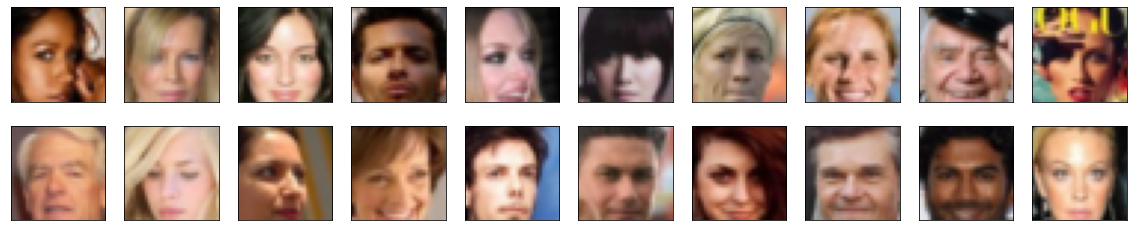

In [5]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img.reshape((32,32,3)))

# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, int(plot_size/2), idx+1, xticks=[], yticks=[])
    imshow(images[idx])

#### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [6]:
# TODO: Complete the scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    # Note, it is not doable with Sklearn scalers.
    # It should be done manually with 2 or 3 lines of code.
    x = x*(feature_range[1] - feature_range[0]) + feature_range[0]
    return x


In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# check scaled range
# should be close to -1 to 1
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())

Min:  tensor(-0.9922)
Max:  tensor(0.8745)


---
# Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

## Discriminator

Your first task will be to define the discriminator. This is a convolutional classifier like you've built before, only without any maxpooling layers. To deal with this complex data, it's suggested you use a deep network with **normalization**. You are also allowed to create any helper functions that may be useful.

#### Exercise: Complete the Discriminator class
* The inputs to the discriminator are 32x32x3 tensor images
* The output should be a single value that will indicate whether a given image is real or fake


In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
def conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    conv_layer = nn.Conv2d(in_channels, out_channels, 
                           kernel_size, stride, padding, bias=False)
    
    # append conv layer
    layers.append(conv_layer)

    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
     
    # using Sequential container
    return nn.Sequential(*layers)

class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        """
        super(Discriminator, self).__init__()

        # complete init function
        # 3 (convultional layer + batch normalization layer)'s => should be enough
        # Make use of the conv function defined for you above.
        # You should also define a fully-connected layer here.
        # Write 4 or 5 lines here
        
        self.conv_dim = conv_dim
        
        self.conv1 = conv(3, conv_dim, 4, batch_norm=False)
        self.conv2 = conv(conv_dim, conv_dim*2, 4)
        self.conv3 = conv(conv_dim*2, conv_dim*4, 4)
        self.conv4 = conv(conv_dim*4, conv_dim*8, 4)
        self.fc = nn.Linear(conv_dim*8*2*2, 1)
        
    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: Discriminator logits; the output of the neural network
        """
        # define feedforward behavior
        # Use the defined conv layers and the fc layer here.
        # Write 4-6 lines here
        
        x = F.leaky_relu(self.conv1(x), 0.3)
        x = F.leaky_relu(self.conv2(x), 0.3)
        x = F.leaky_relu(self.conv3(x), 0.3)
        x = F.leaky_relu(self.conv4(x), 0.3)
        
        x = x.view(-1, self.conv_dim*8*2*2)
        x = self.fc(x)
        
        return x

## Generator

The generator should upsample an input and generate a *new* image of the same size as our training data `32x32x3`. This should be mostly transpose convolutional layers with normalization applied to the outputs.

#### Exercise: Complete the Generator class
* The inputs to the generator are vectors of some length `z_size`
* The output should be a image of shape `32x32x3`

In [10]:
def deconv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a transposed-convolutional layer, with optional batch normalization.
    """
    # create a sequence of transpose + optional batch norm layers
    layers = []
    transpose_conv_layer = nn.ConvTranspose2d(in_channels, out_channels, 
                                              kernel_size, stride, padding, bias=False)
    # append transpose convolutional layer
    layers.append(transpose_conv_layer)
    
    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
        
    return nn.Sequential(*layers)

class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        """
        super(Generator, self).__init__()
        
        # complete init function
        # 3 (convultional transpose layer + batch normalization layer)'s => should be enough
        # Dont put batch normalization after the last deconv layer.
        # Make use of the deconv function defined for you above.
        # You should also define a fully-connected layer here.
        # This function should be the mirrored functionality of the discriminator.
        # Write 4 or 5 lines here

        self.conv_dim = conv_dim
        self.fc = nn.Linear(z_size, conv_dim*8*2*2)

        self.deconv1 = deconv(conv_dim*8, conv_dim*4, 4)
        self.deconv2 = deconv(conv_dim*4, conv_dim*2, 4)
        self.deconv3 = deconv(conv_dim*2, conv_dim, 4)
        self.deconv4 = deconv(conv_dim, 3, 4, batch_norm=False)

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: A 32x32x3 Tensor image as output
        """
        # define feedforward behavior

        out = self.fc(x)
        out = out.view(-1, self.conv_dim*8, 2, 2)
        
        out = F.relu(self.deconv1(out))
        out = F.relu(self.deconv2(out))
        out = F.relu(self.deconv3(out))
        
        out = self.deconv4(out)
        x = torch.tanh(out)

        return x

## Initialize the weights of your networks

To help your models converge, we will initialize the weights of the convolutional and linear layers in your model. From reading the [original DCGAN paper](https://arxiv.org/pdf/1511.06434.pdf), they say:
> All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.



In [11]:
from torch.nn import init

def weights_init_normal(m):
  classname = m.__class__.__name__
  if hasattr(m, 'weight') and (classname.find('Conv') != -1 or classname.find('Linear') != -1 or classname.find('Conv2d') != -1 or classname.find('ConvTranspose2d') != -1):
    init.normal_(m.weight.data, 0.0, 0.02)        
  if hasattr(m, 'bias') and m.bias is not None:
    init.constant_(m.bias.data, 0.0)
    
    

## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL.
"""
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)

    # initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)

    print(D)
    print()
    print(G)
    
    return D, G


#### Exercise: Define model hyperparameters

In [13]:
# Define model hyperparams
d_conv_dim = 50 
g_conv_dim = 50
z_size = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

Discriminator(
  (conv1): Sequential(
    (0): Conv2d(3, 50, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv2): Sequential(
    (0): Conv2d(50, 100, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(100, 200, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): Sequential(
    (0): Conv2d(200, 400, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc): Linear(in_features=1600, out_features=1, bias=True)
)

Generator(
  (fc): Linear(in_features=100, out_features=1600, bias=True)
  (deconv1): Sequential(
    (0): ConvTranspose2d(400, 200, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=Fal

### Training on GPU

Check if you can train on GPU. Here, we'll set this as a boolean variable `train_on_gpu`. Later, you'll be responsible for making sure that 
>* Models,
* Model inputs, and
* Loss function arguments

Are moved to GPU, where appropriate.

In [14]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


---
## Discriminator and Generator Losses

Now we need to calculate the losses for both types of adversarial networks.

### Discriminator Losses

> * For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`. 
* Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.


### Generator Loss

The generator loss will look similar only with flipped labels. The generator's goal is to get the discriminator to *think* its generated images are *real*.

#### Exercise: Complete real and fake loss functions

**You may choose to use either cross entropy or a least squares error loss to complete the following `real_loss` and `fake_loss` functions.**

In [15]:
def real_loss(D_out):
    '''Calculates how close discriminator outputs are to being real.
       param, D_out: discriminator logits
       return: real loss'''
    batch_size = D_out.size(0)
    
    labels = torch.ones(batch_size)
    labels = labels.cuda()
    
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    '''Calculates how close discriminator outputs are to being fake.
       param, D_out: discriminator logits
       return: fake loss'''
    batch_size = D_out.size(0)
    
    labels = torch.zeros(batch_size)
    labels = labels.cuda()
    
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(D_out.squeeze(), labels)

    return loss

## Optimizers

#### Exercise: Define optimizers for your Discriminator (D) and Generator (G)

Define optimizers for your models with appropriate hyperparameters.

In [16]:
import torch.optim as optim

# Create optimizers for the discriminator D and generator G
d_optimizer = optim.Adam(D.parameters(), lr=0.0005, betas=(0.4, 0.999))
g_optimizer = optim.Adam(G.parameters(), lr=0.0005, betas=(0.4, 0.999))

---
## Training

Training will involve alternating between training the discriminator and the generator. You'll use your functions `real_loss` and `fake_loss` to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function


#### Saving Samples

You've been given some code to print out some loss statistics and save some generated "fake" samples.

#### Exercise: Complete the training function

Keep in mind that, if you've moved your models to GPU, you'll also have to move any model inputs to GPU.

In [17]:
def train(D, G, n_epochs, print_every=50):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''
    
    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()

    # keep track of loss and generated, "fake" samples
    samples = []
    losses = []

    # Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=16
    fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
    fixed_z = torch.from_numpy(fixed_z).float()
    # move z to GPU if available
    if train_on_gpu:
        fixed_z = fixed_z.cuda()

    # epoch training loop
    for epoch in range(n_epochs):

        # batch training loop
        for batch_i, (real_images, _) in enumerate(celeba_train_loader):

            batch_size = real_images.size(0)
            real_images = scale(real_images)

            # ===============================================
            #         YOUR CODE HERE: TRAIN THE NETWORKS
            # ===============================================
            
            d_optimizer.zero_grad()
            real_images = real_images.cuda()
            
            # 1. Train the Discriminator on Real and Fake Images
            
            D_real = D(real_images)
            d_real_loss = real_loss(D_real)
            
            z_fake = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z_fake = torch.from_numpy(z_fake).float()
            
            z_fake = z_fake.cuda()
            fake_images = G(z_fake)
            
            D_fake = D(fake_images)
            d_fake_loss = fake_loss(D_fake)
            
            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()
            d_optimizer.step()

            # 2. Train the Generator with an Adversarial Loss
            g_optimizer.zero_grad()
            
            z_fake = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z_fake = torch.from_numpy(z_fake).float()
            
            z_fake = z_fake.cuda()
            fake_images = G(z_fake)
            
            D_fake = D(fake_images)
            
            g_loss = real_loss(D_fake)
            
            g_loss.backward()
            g_optimizer.step()
            
            # ===============================================
            #              END OF YOUR CODE
            # ===============================================

            # Print some loss stats
            if batch_i % print_every == 0:
                # append discriminator loss and generator loss
                losses.append((d_loss.item(), g_loss.item()))
                # print discriminator and generator loss
                print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                        epoch+1, n_epochs, d_loss.item(), g_loss.item()))


        ## AFTER EACH EPOCH##    
        # this code assumes your generator is named G, feel free to change the name
        # generate and save sample, fake images
        G.eval() # for generating samples
        samples_z = G(fixed_z)
        samples.append(samples_z)
        G.train() # back to training mode

    # Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    # finally return losses
    return losses

Set your number of training epochs and train your GAN!

In [18]:
# set number of epochs 
n_epochs = 30


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# call training function
losses = train(D, G, n_epochs=n_epochs)

Epoch [    1/   30] | d_loss: 1.3810 | g_loss: 2.6908
Epoch [    1/   30] | d_loss: 0.2669 | g_loss: 1.6433
Epoch [    1/   30] | d_loss: 0.5200 | g_loss: 2.1175
Epoch [    1/   30] | d_loss: 1.2486 | g_loss: 0.9347
Epoch [    1/   30] | d_loss: 1.3002 | g_loss: 2.6820
Epoch [    1/   30] | d_loss: 1.1125 | g_loss: 3.1375
Epoch [    1/   30] | d_loss: 0.9936 | g_loss: 2.0457
Epoch [    1/   30] | d_loss: 1.1470 | g_loss: 1.3767
Epoch [    1/   30] | d_loss: 1.0519 | g_loss: 1.4403
Epoch [    1/   30] | d_loss: 1.1863 | g_loss: 2.2300
Epoch [    1/   30] | d_loss: 0.9157 | g_loss: 2.0928
Epoch [    1/   30] | d_loss: 1.2655 | g_loss: 2.8705
Epoch [    1/   30] | d_loss: 1.0646 | g_loss: 1.6941
Epoch [    1/   30] | d_loss: 1.3696 | g_loss: 1.4941
Epoch [    1/   30] | d_loss: 1.2538 | g_loss: 1.8015
Epoch [    1/   30] | d_loss: 1.3921 | g_loss: 2.1125
Epoch [    1/   30] | d_loss: 0.8142 | g_loss: 2.3573
Epoch [    1/   30] | d_loss: 0.9028 | g_loss: 2.2984
Epoch [    1/   30] | d_loss

Epoch [    2/   30] | d_loss: 1.4210 | g_loss: 1.1110
Epoch [    2/   30] | d_loss: 0.8268 | g_loss: 0.8203
Epoch [    2/   30] | d_loss: 0.8119 | g_loss: 1.5873
Epoch [    2/   30] | d_loss: 1.8176 | g_loss: 1.4838
Epoch [    2/   30] | d_loss: 0.7377 | g_loss: 1.9230
Epoch [    2/   30] | d_loss: 1.0115 | g_loss: 1.1811
Epoch [    2/   30] | d_loss: 0.7401 | g_loss: 1.0075
Epoch [    2/   30] | d_loss: 1.2904 | g_loss: 2.1666
Epoch [    2/   30] | d_loss: 0.9576 | g_loss: 2.0752
Epoch [    2/   30] | d_loss: 1.0744 | g_loss: 2.1398
Epoch [    2/   30] | d_loss: 0.8662 | g_loss: 1.8328
Epoch [    2/   30] | d_loss: 1.2971 | g_loss: 1.8071
Epoch [    2/   30] | d_loss: 0.8377 | g_loss: 2.0108
Epoch [    2/   30] | d_loss: 1.8283 | g_loss: 3.2256
Epoch [    2/   30] | d_loss: 1.5971 | g_loss: 1.2566
Epoch [    2/   30] | d_loss: 1.0464 | g_loss: 1.7698
Epoch [    2/   30] | d_loss: 0.5911 | g_loss: 1.6526
Epoch [    2/   30] | d_loss: 0.7849 | g_loss: 1.5921
Epoch [    2/   30] | d_loss

Epoch [    4/   30] | d_loss: 0.5677 | g_loss: 2.1477
Epoch [    4/   30] | d_loss: 0.5686 | g_loss: 2.2676
Epoch [    4/   30] | d_loss: 0.4244 | g_loss: 2.7566
Epoch [    4/   30] | d_loss: 0.7789 | g_loss: 2.8443
Epoch [    4/   30] | d_loss: 0.7793 | g_loss: 1.4330
Epoch [    4/   30] | d_loss: 0.5667 | g_loss: 2.6201
Epoch [    4/   30] | d_loss: 0.4642 | g_loss: 1.2275
Epoch [    4/   30] | d_loss: 0.6648 | g_loss: 2.1051
Epoch [    4/   30] | d_loss: 0.7164 | g_loss: 2.3415
Epoch [    4/   30] | d_loss: 0.5477 | g_loss: 1.6194
Epoch [    4/   30] | d_loss: 0.6563 | g_loss: 3.0348
Epoch [    4/   30] | d_loss: 0.6835 | g_loss: 1.2658
Epoch [    4/   30] | d_loss: 1.0657 | g_loss: 2.5867
Epoch [    4/   30] | d_loss: 0.7261 | g_loss: 1.5950
Epoch [    4/   30] | d_loss: 1.0511 | g_loss: 0.9307
Epoch [    4/   30] | d_loss: 0.7007 | g_loss: 2.4016
Epoch [    4/   30] | d_loss: 0.4124 | g_loss: 3.3038
Epoch [    4/   30] | d_loss: 0.6746 | g_loss: 2.4063
Epoch [    4/   30] | d_loss

Epoch [    6/   30] | d_loss: 0.6551 | g_loss: 1.8767
Epoch [    6/   30] | d_loss: 0.4723 | g_loss: 1.3409
Epoch [    6/   30] | d_loss: 0.2213 | g_loss: 2.3757
Epoch [    6/   30] | d_loss: 0.8051 | g_loss: 2.5157
Epoch [    6/   30] | d_loss: 1.1093 | g_loss: 3.8846
Epoch [    6/   30] | d_loss: 0.7576 | g_loss: 2.7310
Epoch [    6/   30] | d_loss: 0.5005 | g_loss: 2.1430
Epoch [    6/   30] | d_loss: 0.7247 | g_loss: 1.2371
Epoch [    6/   30] | d_loss: 0.5275 | g_loss: 1.2166
Epoch [    6/   30] | d_loss: 0.9272 | g_loss: 0.7724
Epoch [    6/   30] | d_loss: 0.7158 | g_loss: 2.0809
Epoch [    6/   30] | d_loss: 0.1560 | g_loss: 2.5715
Epoch [    6/   30] | d_loss: 0.2900 | g_loss: 3.2449
Epoch [    6/   30] | d_loss: 0.5331 | g_loss: 1.8021
Epoch [    6/   30] | d_loss: 0.4358 | g_loss: 3.7359
Epoch [    6/   30] | d_loss: 0.9214 | g_loss: 3.0601
Epoch [    6/   30] | d_loss: 0.4758 | g_loss: 1.3604
Epoch [    6/   30] | d_loss: 0.2719 | g_loss: 2.5674
Epoch [    6/   30] | d_loss

Epoch [    7/   30] | d_loss: 0.9146 | g_loss: 1.5875
Epoch [    7/   30] | d_loss: 0.6588 | g_loss: 2.7183
Epoch [    7/   30] | d_loss: 0.3430 | g_loss: 2.8824
Epoch [    7/   30] | d_loss: 0.4877 | g_loss: 2.5262
Epoch [    7/   30] | d_loss: 0.1685 | g_loss: 4.4482
Epoch [    7/   30] | d_loss: 0.4122 | g_loss: 3.8967
Epoch [    7/   30] | d_loss: 0.5351 | g_loss: 4.4918
Epoch [    7/   30] | d_loss: 0.2013 | g_loss: 2.5117
Epoch [    7/   30] | d_loss: 0.3415 | g_loss: 3.5458
Epoch [    7/   30] | d_loss: 0.6053 | g_loss: 2.0246
Epoch [    7/   30] | d_loss: 0.5122 | g_loss: 2.3687
Epoch [    7/   30] | d_loss: 0.5641 | g_loss: 3.1322
Epoch [    7/   30] | d_loss: 0.4795 | g_loss: 2.6108
Epoch [    7/   30] | d_loss: 0.4846 | g_loss: 3.8021
Epoch [    7/   30] | d_loss: 0.1284 | g_loss: 5.5284
Epoch [    7/   30] | d_loss: 0.2884 | g_loss: 3.4807
Epoch [    7/   30] | d_loss: 0.5179 | g_loss: 4.5529
Epoch [    7/   30] | d_loss: 0.7882 | g_loss: 2.0222
Epoch [    7/   30] | d_loss

Epoch [    9/   30] | d_loss: 0.8471 | g_loss: 2.7824
Epoch [    9/   30] | d_loss: 0.4386 | g_loss: 2.3362
Epoch [    9/   30] | d_loss: 0.6607 | g_loss: 3.9182
Epoch [    9/   30] | d_loss: 0.8044 | g_loss: 2.1473
Epoch [    9/   30] | d_loss: 0.3456 | g_loss: 3.8464
Epoch [    9/   30] | d_loss: 0.7963 | g_loss: 1.5943
Epoch [    9/   30] | d_loss: 0.5381 | g_loss: 1.8640
Epoch [    9/   30] | d_loss: 0.7010 | g_loss: 3.4063
Epoch [    9/   30] | d_loss: 0.5093 | g_loss: 3.4214
Epoch [    9/   30] | d_loss: 0.1473 | g_loss: 3.4267
Epoch [    9/   30] | d_loss: 0.2964 | g_loss: 2.7103
Epoch [    9/   30] | d_loss: 0.4272 | g_loss: 1.9680
Epoch [    9/   30] | d_loss: 0.4262 | g_loss: 2.4994
Epoch [    9/   30] | d_loss: 1.1095 | g_loss: 2.2455
Epoch [    9/   30] | d_loss: 0.2684 | g_loss: 2.6358
Epoch [    9/   30] | d_loss: 0.2612 | g_loss: 4.7304
Epoch [    9/   30] | d_loss: 0.5140 | g_loss: 3.5710
Epoch [    9/   30] | d_loss: 0.7894 | g_loss: 4.8440
Epoch [    9/   30] | d_loss

Epoch [   11/   30] | d_loss: 0.6143 | g_loss: 2.8797
Epoch [   11/   30] | d_loss: 0.5315 | g_loss: 2.8569
Epoch [   11/   30] | d_loss: 0.5016 | g_loss: 3.4758
Epoch [   11/   30] | d_loss: 0.4922 | g_loss: 1.6788
Epoch [   11/   30] | d_loss: 0.6834 | g_loss: 4.2918
Epoch [   11/   30] | d_loss: 0.1950 | g_loss: 1.3439
Epoch [   11/   30] | d_loss: 0.2092 | g_loss: 2.7348
Epoch [   11/   30] | d_loss: 0.3317 | g_loss: 3.9792
Epoch [   11/   30] | d_loss: 0.1802 | g_loss: 1.7456
Epoch [   11/   30] | d_loss: 1.1419 | g_loss: 1.9138
Epoch [   11/   30] | d_loss: 0.2570 | g_loss: 2.6086
Epoch [   11/   30] | d_loss: 0.4945 | g_loss: 2.0056
Epoch [   11/   30] | d_loss: 0.4998 | g_loss: 5.4083
Epoch [   11/   30] | d_loss: 0.2033 | g_loss: 5.6408
Epoch [   11/   30] | d_loss: 0.3076 | g_loss: 2.4431
Epoch [   11/   30] | d_loss: 0.6173 | g_loss: 2.7258
Epoch [   11/   30] | d_loss: 0.6022 | g_loss: 2.7848
Epoch [   11/   30] | d_loss: 0.4276 | g_loss: 3.8560
Epoch [   11/   30] | d_loss

Epoch [   12/   30] | d_loss: 0.5391 | g_loss: 3.7811
Epoch [   12/   30] | d_loss: 1.5135 | g_loss: 6.5223
Epoch [   12/   30] | d_loss: 0.2121 | g_loss: 3.7152
Epoch [   12/   30] | d_loss: 0.1607 | g_loss: 3.1434
Epoch [   12/   30] | d_loss: 0.8913 | g_loss: 5.1338
Epoch [   12/   30] | d_loss: 0.4501 | g_loss: 4.7526
Epoch [   12/   30] | d_loss: 0.2253 | g_loss: 4.6209
Epoch [   12/   30] | d_loss: 0.7734 | g_loss: 2.2090
Epoch [   12/   30] | d_loss: 1.0515 | g_loss: 2.0048
Epoch [   12/   30] | d_loss: 0.2531 | g_loss: 2.3017
Epoch [   12/   30] | d_loss: 0.5157 | g_loss: 3.4626
Epoch [   12/   30] | d_loss: 0.1098 | g_loss: 3.2486
Epoch [   12/   30] | d_loss: 0.5466 | g_loss: 5.6007
Epoch [   12/   30] | d_loss: 0.5730 | g_loss: 1.7438
Epoch [   12/   30] | d_loss: 0.1066 | g_loss: 4.1010
Epoch [   12/   30] | d_loss: 0.4704 | g_loss: 4.0005
Epoch [   13/   30] | d_loss: 0.1829 | g_loss: 6.6238
Epoch [   13/   30] | d_loss: 0.4519 | g_loss: 5.2035
Epoch [   13/   30] | d_loss

Epoch [   14/   30] | d_loss: 0.0828 | g_loss: 3.3074
Epoch [   14/   30] | d_loss: 0.4750 | g_loss: 4.1427
Epoch [   14/   30] | d_loss: 0.2106 | g_loss: 5.0455
Epoch [   14/   30] | d_loss: 0.6305 | g_loss: 5.8711
Epoch [   14/   30] | d_loss: 1.0867 | g_loss: 5.4530
Epoch [   14/   30] | d_loss: 0.5062 | g_loss: 4.5702
Epoch [   14/   30] | d_loss: 0.9384 | g_loss: 2.4836
Epoch [   14/   30] | d_loss: 0.5144 | g_loss: 5.4309
Epoch [   14/   30] | d_loss: 0.4264 | g_loss: 2.6686
Epoch [   14/   30] | d_loss: 0.2294 | g_loss: 3.4335
Epoch [   14/   30] | d_loss: 0.0765 | g_loss: 3.0236
Epoch [   14/   30] | d_loss: 0.2166 | g_loss: 4.3629
Epoch [   14/   30] | d_loss: 0.1415 | g_loss: 3.6467
Epoch [   14/   30] | d_loss: 0.0545 | g_loss: 5.3396
Epoch [   14/   30] | d_loss: 0.6123 | g_loss: 2.8862
Epoch [   14/   30] | d_loss: 0.4583 | g_loss: 2.8160
Epoch [   14/   30] | d_loss: 0.0920 | g_loss: 5.7391
Epoch [   14/   30] | d_loss: 0.2557 | g_loss: 2.7269
Epoch [   14/   30] | d_loss

Epoch [   16/   30] | d_loss: 0.0785 | g_loss: 6.5791
Epoch [   16/   30] | d_loss: 0.4490 | g_loss: 3.3001
Epoch [   16/   30] | d_loss: 0.1894 | g_loss: 3.3367
Epoch [   16/   30] | d_loss: 0.2136 | g_loss: 1.1421
Epoch [   16/   30] | d_loss: 0.0382 | g_loss: 3.7859
Epoch [   16/   30] | d_loss: 0.4062 | g_loss: 4.2140
Epoch [   16/   30] | d_loss: 0.3587 | g_loss: 2.1142
Epoch [   16/   30] | d_loss: 0.1700 | g_loss: 6.6546
Epoch [   16/   30] | d_loss: 0.2439 | g_loss: 1.9040
Epoch [   16/   30] | d_loss: 0.0859 | g_loss: 3.9820
Epoch [   16/   30] | d_loss: 0.1564 | g_loss: 4.7496
Epoch [   16/   30] | d_loss: 0.1310 | g_loss: 5.7403
Epoch [   16/   30] | d_loss: 0.8441 | g_loss: 3.6914
Epoch [   16/   30] | d_loss: 0.8136 | g_loss: 5.3483
Epoch [   16/   30] | d_loss: 0.0413 | g_loss: 4.7104
Epoch [   16/   30] | d_loss: 0.3001 | g_loss: 2.3103
Epoch [   16/   30] | d_loss: 0.2220 | g_loss: 4.4505
Epoch [   16/   30] | d_loss: 0.0739 | g_loss: 4.7306
Epoch [   16/   30] | d_loss

Epoch [   17/   30] | d_loss: 0.4156 | g_loss: 3.7410
Epoch [   17/   30] | d_loss: 0.3735 | g_loss: 4.6108
Epoch [   17/   30] | d_loss: 0.5191 | g_loss: 5.6917
Epoch [   17/   30] | d_loss: 0.2728 | g_loss: 3.5623
Epoch [   17/   30] | d_loss: 0.4099 | g_loss: 4.4597
Epoch [   17/   30] | d_loss: 0.1028 | g_loss: 5.2157
Epoch [   17/   30] | d_loss: 0.7072 | g_loss: 6.0808
Epoch [   17/   30] | d_loss: 0.3456 | g_loss: 3.2357
Epoch [   17/   30] | d_loss: 0.3671 | g_loss: 4.0649
Epoch [   17/   30] | d_loss: 0.1955 | g_loss: 4.2913
Epoch [   18/   30] | d_loss: 0.4288 | g_loss: 4.7815
Epoch [   18/   30] | d_loss: 0.1087 | g_loss: 4.9505
Epoch [   18/   30] | d_loss: 0.0118 | g_loss: 5.9959
Epoch [   18/   30] | d_loss: 0.0104 | g_loss: 6.1065
Epoch [   18/   30] | d_loss: 0.7091 | g_loss: 4.6839
Epoch [   18/   30] | d_loss: 0.0630 | g_loss: 4.7410
Epoch [   18/   30] | d_loss: 0.1248 | g_loss: 4.4216
Epoch [   18/   30] | d_loss: 0.1818 | g_loss: 3.2342
Epoch [   18/   30] | d_loss

Epoch [   19/   30] | d_loss: 0.0975 | g_loss: 3.1335
Epoch [   19/   30] | d_loss: 0.0430 | g_loss: 6.3884
Epoch [   19/   30] | d_loss: 0.4077 | g_loss: 2.6250
Epoch [   19/   30] | d_loss: 0.6477 | g_loss: 2.8646
Epoch [   19/   30] | d_loss: 0.1594 | g_loss: 3.6206
Epoch [   19/   30] | d_loss: 0.2137 | g_loss: 6.6469
Epoch [   19/   30] | d_loss: 0.1142 | g_loss: 5.6924
Epoch [   19/   30] | d_loss: 0.3374 | g_loss: 2.5340
Epoch [   19/   30] | d_loss: 0.0506 | g_loss: 6.9075
Epoch [   19/   30] | d_loss: 0.0546 | g_loss: 3.9478
Epoch [   19/   30] | d_loss: 0.0303 | g_loss: 4.4879
Epoch [   19/   30] | d_loss: 0.5139 | g_loss: 2.5173
Epoch [   19/   30] | d_loss: 0.2225 | g_loss: 6.0410
Epoch [   19/   30] | d_loss: 0.3473 | g_loss: 4.1099
Epoch [   19/   30] | d_loss: 0.1484 | g_loss: 4.7168
Epoch [   19/   30] | d_loss: 1.0099 | g_loss: 2.8257
Epoch [   19/   30] | d_loss: 0.2621 | g_loss: 3.4282
Epoch [   19/   30] | d_loss: 0.3463 | g_loss: 5.4571
Epoch [   19/   30] | d_loss

Epoch [   21/   30] | d_loss: 0.0824 | g_loss: 4.5947
Epoch [   21/   30] | d_loss: 0.4754 | g_loss: 5.2734
Epoch [   21/   30] | d_loss: 0.2935 | g_loss: 6.8967
Epoch [   21/   30] | d_loss: 0.5095 | g_loss: 3.2276
Epoch [   21/   30] | d_loss: 1.0764 | g_loss: 3.9087
Epoch [   21/   30] | d_loss: 0.2717 | g_loss: 2.7102
Epoch [   21/   30] | d_loss: 0.0843 | g_loss: 4.8485
Epoch [   21/   30] | d_loss: 0.2370 | g_loss: 5.6548
Epoch [   21/   30] | d_loss: 0.9046 | g_loss: 2.8294
Epoch [   21/   30] | d_loss: 0.3458 | g_loss: 6.5387
Epoch [   21/   30] | d_loss: 0.4293 | g_loss: 5.5472
Epoch [   21/   30] | d_loss: 0.2415 | g_loss: 4.7896
Epoch [   21/   30] | d_loss: 0.2420 | g_loss: 2.6516
Epoch [   21/   30] | d_loss: 0.1058 | g_loss: 4.4926
Epoch [   21/   30] | d_loss: 0.0857 | g_loss: 4.4693
Epoch [   21/   30] | d_loss: 0.1411 | g_loss: 6.6404
Epoch [   21/   30] | d_loss: 1.4161 | g_loss: 8.6978
Epoch [   21/   30] | d_loss: 0.0434 | g_loss: 5.0031
Epoch [   21/   30] | d_loss

Epoch [   22/   30] | d_loss: 0.2755 | g_loss: 6.3100
Epoch [   22/   30] | d_loss: 0.1425 | g_loss: 4.9382
Epoch [   22/   30] | d_loss: 0.3616 | g_loss: 5.0055
Epoch [   22/   30] | d_loss: 0.0730 | g_loss: 6.1223
Epoch [   23/   30] | d_loss: 0.2315 | g_loss: 5.8036
Epoch [   23/   30] | d_loss: 0.2563 | g_loss: 2.1980
Epoch [   23/   30] | d_loss: 0.2661 | g_loss: 4.0079
Epoch [   23/   30] | d_loss: 0.0920 | g_loss: 3.2675
Epoch [   23/   30] | d_loss: 0.3145 | g_loss: 4.9412
Epoch [   23/   30] | d_loss: 0.2951 | g_loss: 7.2539
Epoch [   23/   30] | d_loss: 0.0272 | g_loss: 3.0180
Epoch [   23/   30] | d_loss: 0.1955 | g_loss: 6.3742
Epoch [   23/   30] | d_loss: 0.1190 | g_loss: 5.4959
Epoch [   23/   30] | d_loss: 0.2221 | g_loss: 4.1085
Epoch [   23/   30] | d_loss: 0.2939 | g_loss: 4.1216
Epoch [   23/   30] | d_loss: 0.5982 | g_loss: 3.2646
Epoch [   23/   30] | d_loss: 0.2584 | g_loss: 3.1979
Epoch [   23/   30] | d_loss: 0.0594 | g_loss: 5.6130
Epoch [   23/   30] | d_loss

Epoch [   24/   30] | d_loss: 0.4012 | g_loss: 5.3700
Epoch [   24/   30] | d_loss: 0.1790 | g_loss: 5.2543
Epoch [   24/   30] | d_loss: 0.1193 | g_loss: 5.5238
Epoch [   24/   30] | d_loss: 0.1554 | g_loss: 5.3390
Epoch [   24/   30] | d_loss: 0.0215 | g_loss: 2.1402
Epoch [   24/   30] | d_loss: 0.2352 | g_loss: 3.6647
Epoch [   24/   30] | d_loss: 0.4938 | g_loss: 4.9533
Epoch [   24/   30] | d_loss: 0.1658 | g_loss: 2.7312
Epoch [   24/   30] | d_loss: 0.0097 | g_loss: 3.7839
Epoch [   24/   30] | d_loss: 0.4098 | g_loss: 4.9724
Epoch [   24/   30] | d_loss: 0.5716 | g_loss: 3.3016
Epoch [   24/   30] | d_loss: 0.6289 | g_loss: 2.8002
Epoch [   24/   30] | d_loss: 0.0998 | g_loss: 5.4561
Epoch [   24/   30] | d_loss: 0.0807 | g_loss: 6.3585
Epoch [   24/   30] | d_loss: 0.1041 | g_loss: 2.7576
Epoch [   24/   30] | d_loss: 0.0958 | g_loss: 5.2680
Epoch [   24/   30] | d_loss: 0.1189 | g_loss: 6.2358
Epoch [   24/   30] | d_loss: 0.0995 | g_loss: 5.4251
Epoch [   24/   30] | d_loss

Epoch [   26/   30] | d_loss: 0.1038 | g_loss: 5.4850
Epoch [   26/   30] | d_loss: 0.2947 | g_loss: 3.5712
Epoch [   26/   30] | d_loss: 0.0534 | g_loss: 4.1315
Epoch [   26/   30] | d_loss: 1.2421 | g_loss: 2.3668
Epoch [   26/   30] | d_loss: 0.6344 | g_loss: 2.4009
Epoch [   26/   30] | d_loss: 0.0516 | g_loss: 4.1949
Epoch [   26/   30] | d_loss: 0.2805 | g_loss: 2.1856
Epoch [   26/   30] | d_loss: 0.2582 | g_loss: 5.0977
Epoch [   26/   30] | d_loss: 0.0662 | g_loss: 3.8343
Epoch [   26/   30] | d_loss: 0.3327 | g_loss: 6.6224
Epoch [   26/   30] | d_loss: 0.1695 | g_loss: 5.9737
Epoch [   26/   30] | d_loss: 0.4306 | g_loss: 5.5355
Epoch [   26/   30] | d_loss: 0.1238 | g_loss: 4.1655
Epoch [   26/   30] | d_loss: 0.1640 | g_loss: 2.4785
Epoch [   26/   30] | d_loss: 0.1549 | g_loss: 4.0350
Epoch [   26/   30] | d_loss: 0.1922 | g_loss: 4.5600
Epoch [   26/   30] | d_loss: 0.1851 | g_loss: 6.1052
Epoch [   26/   30] | d_loss: 0.1618 | g_loss: 5.7380
Epoch [   26/   30] | d_loss

Epoch [   28/   30] | d_loss: 0.0446 | g_loss: 7.3176
Epoch [   28/   30] | d_loss: 0.2203 | g_loss: 3.9135
Epoch [   28/   30] | d_loss: 0.2959 | g_loss: 6.1256
Epoch [   28/   30] | d_loss: 0.0026 | g_loss: 7.2920
Epoch [   28/   30] | d_loss: 0.0748 | g_loss: 7.6520
Epoch [   28/   30] | d_loss: 0.0408 | g_loss: 4.5795
Epoch [   28/   30] | d_loss: 0.6408 | g_loss: 6.3685
Epoch [   28/   30] | d_loss: 0.0975 | g_loss: 6.5281
Epoch [   28/   30] | d_loss: 0.0829 | g_loss: 5.0545
Epoch [   28/   30] | d_loss: 0.0497 | g_loss: 4.6125
Epoch [   28/   30] | d_loss: 0.0666 | g_loss: 2.9772
Epoch [   28/   30] | d_loss: 0.0330 | g_loss: 5.8519
Epoch [   28/   30] | d_loss: 0.0285 | g_loss: 5.8718
Epoch [   28/   30] | d_loss: 0.0661 | g_loss: 2.6341
Epoch [   28/   30] | d_loss: 0.1248 | g_loss: 4.8098
Epoch [   28/   30] | d_loss: 0.1590 | g_loss: 5.2418
Epoch [   28/   30] | d_loss: 0.0697 | g_loss: 3.9452
Epoch [   28/   30] | d_loss: 0.0883 | g_loss: 3.3818
Epoch [   28/   30] | d_loss

Epoch [   29/   30] | d_loss: 0.0683 | g_loss: 6.8542
Epoch [   29/   30] | d_loss: 0.0343 | g_loss: 4.7162
Epoch [   29/   30] | d_loss: 0.0962 | g_loss: 5.7257
Epoch [   29/   30] | d_loss: 0.0363 | g_loss: 6.4369
Epoch [   29/   30] | d_loss: 0.0277 | g_loss: 4.3013
Epoch [   29/   30] | d_loss: 0.0585 | g_loss: 6.5092
Epoch [   29/   30] | d_loss: 1.1659 | g_loss: 4.3357
Epoch [   29/   30] | d_loss: 1.0175 | g_loss: 2.4855
Epoch [   29/   30] | d_loss: 0.3890 | g_loss: 6.3903
Epoch [   29/   30] | d_loss: 0.0704 | g_loss: 7.6470
Epoch [   29/   30] | d_loss: 0.4209 | g_loss: 8.3579
Epoch [   29/   30] | d_loss: 0.5186 | g_loss: 2.7369
Epoch [   29/   30] | d_loss: 0.5267 | g_loss: 3.4868
Epoch [   29/   30] | d_loss: 0.0813 | g_loss: 5.6433
Epoch [   29/   30] | d_loss: 0.1853 | g_loss: 9.2547
Epoch [   29/   30] | d_loss: 0.1318 | g_loss: 4.9922
Epoch [   29/   30] | d_loss: 0.1871 | g_loss: 7.5177
Epoch [   29/   30] | d_loss: 0.2026 | g_loss: 3.4856
Epoch [   29/   30] | d_loss

## Training loss

Plot the training losses for the generator and discriminator, recorded after each epoch.

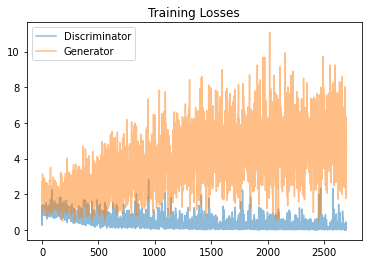

In [19]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Generator samples from training

View samples of images from the generator, and answer a question about the strengths and weaknesses of your trained models.

In [20]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))

In [21]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

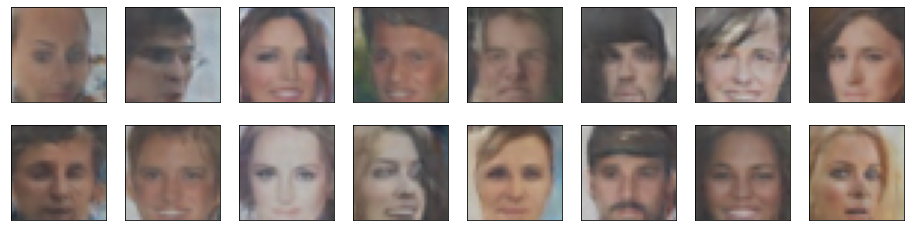

In [22]:
_ = view_samples(-1, samples)